# Classificação

Construa um classificador e identifique quais variáveis exercem maior impacto sobre o “​target” ​e informe o porquê interpretando os resultados obtidos.

1. métricas: precision, recall e F2-score;
2. dados: classification_data.zip;

In [46]:
%pylab inline

import seaborn as sns
import pandas as pd
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from utils import zscore

style.use('material_darker')
figsize(10, 8)

Populating the interactive namespace from numpy and matplotlib


In [50]:
train = pd.read_csv("../DS Challenge/classification_train.csv")
train_target = train.pop("target")
train = zscore(train)
test = pd.read_csv("../DS Challenge/classification_test.csv")
test_target = test.pop("target")
test = zscore(test)

## visualizando os dados

In [3]:
train.describe()

,x1,x2
count,6.700000e+02,6.700000e+02
mean,9.776591e-18,3.519521e-16
std,1.000000e+00,1.000000e+00
min,-2.647207e+00,-2.563452e+00
25%,-7.121325e-01,-6.858287e-01
50%,1.165905e-02,2.101769e-02
75%,7.410108e-01,7.397745e-01
max,2.305040e+00,2.669101e+00


<AxesSubplot:xlabel='x1', ylabel='x2'>

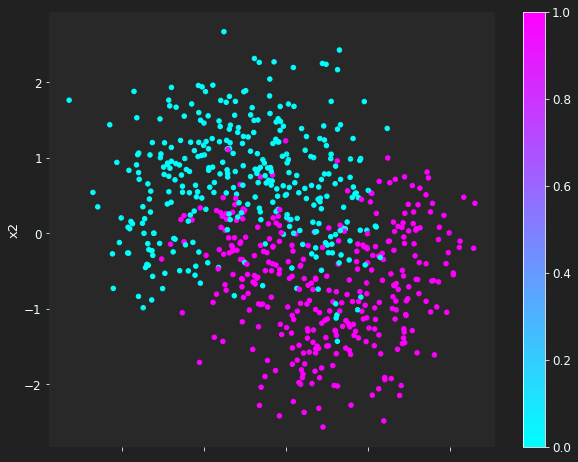

In [47]:
train.plot.scatter(x="x1", y="x2", c=train_target, cmap="cool")

In [5]:
model = ExtraTreesClassifier(n_estimators=100).fit(train.to_numpy(), train_target)
sfm = SelectFromModel(model, prefit=True)
model.feature_importances_

array([0.44842868, 0.55157132])

São só 2 features e elas não apresentam grandes diferenças de importância, então nenhuma feature será excluída

## Definindo os parâmetros do classificador e fazendo o treinamento

In [6]:
parameters = {
    "kernel": ["rbf", "poly", "sigmoid"],
    "C": linspace(0.1, 10, 50),
    "gamma": linspace(0.1, 1.5, 50)
}
svc = SVC()
grid =  GridSearchCV(svc, parameters, n_jobs=-1)
grid.fit(train, train_target)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([ 0.1       ,  0.30204082,  0.50408163,  0.70612245,  0.90816327,
        1.11020408,  1.3122449 ,  1.51428571,  1.71632653,  1.91836735,
        2.12040816,  2.32244898,  2.5244898 ,  2.72653061,  2.92857143,
        3.13061224,  3.33265306,  3.53469388,  3.73673469,  3.93877551,
        4.14081633,  4.34285714,  4.54489796,  4.74693878,  4.94897959,
        5.15102041,  5.35306122,...
       0.52857143, 0.55714286, 0.58571429, 0.61428571, 0.64285714,
       0.67142857, 0.7       , 0.72857143, 0.75714286, 0.78571429,
       0.81428571, 0.84285714, 0.87142857, 0.9       , 0.92857143,
       0.95714286, 0.98571429, 1.01428571, 1.04285714, 1.07142857,
       1.1       , 1.12857143, 1.15714286, 1.18571429, 1.21428571,
       1.24285714, 1.27142857, 1.3       , 1.32857143, 1.35714286,
       1.38571429, 1.41428571, 1.44285714, 1.47142857, 1.5       ]),
                         'kernel': ['rbf', 'poly', 'sigmoid']}

In [7]:
grid.best_params_

{'C': 10.0, 'gamma': 0.9857142857142857, 'kernel': 'rbf'}

In [8]:
svc = SVC(**grid.best_params_)
svc.fit(train, train_target)

SVC(C=10.0, gamma=0.9857142857142857)

## Avaliando o resultado

In [9]:
result = svc.predict(test)
print(metrics.classification_report(test_target, result))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       169
           1       0.86      0.90      0.88       161

    accuracy                           0.88       330
   macro avg       0.88      0.88      0.88       330
weighted avg       0.88      0.88      0.88       330



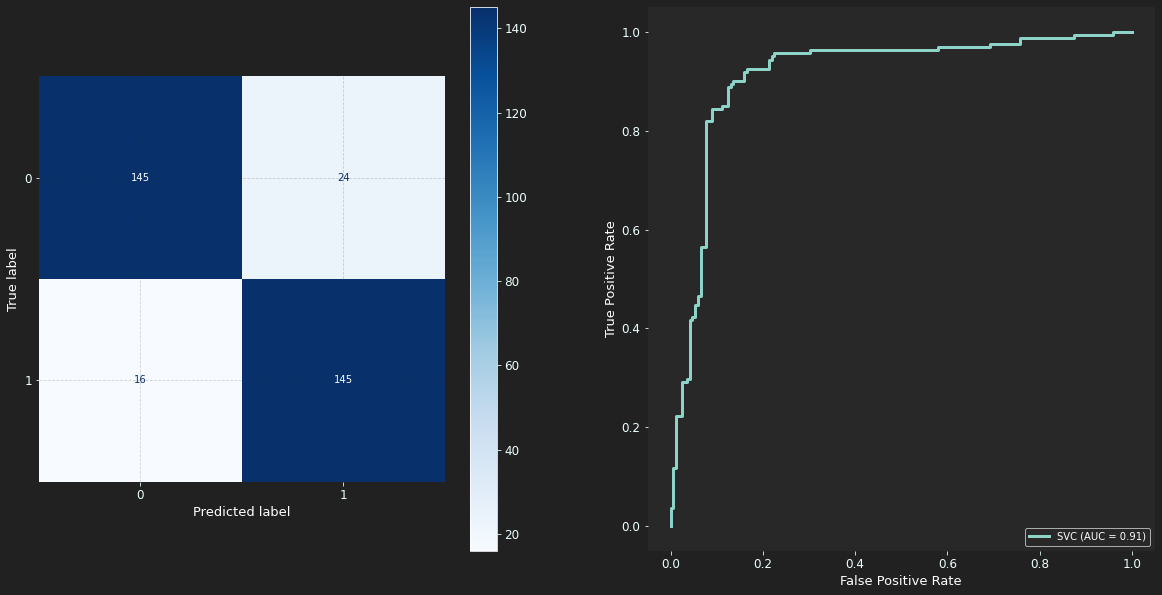

In [10]:
fig, (ax0, ax1) = subplots(1, 2, figsize=(20, 10));
metrics.plot_confusion_matrix(svc, test, test_target, cmap="Blues", ax=ax0)
metrics.plot_roc_curve(svc, test, test_target, ax=ax1)

<AxesSubplot:xlabel='x1', ylabel='x2'>

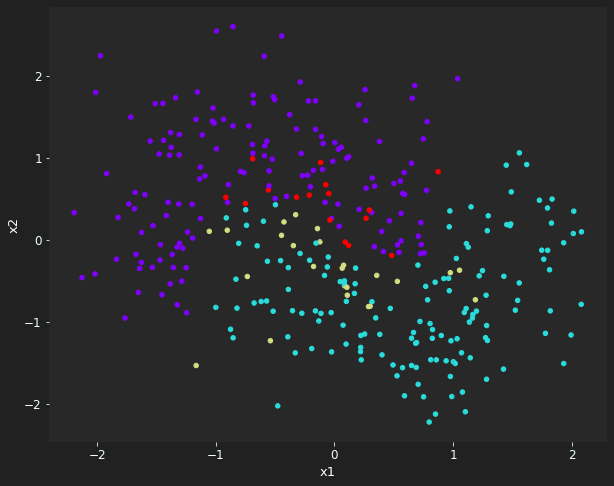

In [51]:

result_descr = []

for pred, tgt in zip(result, test_target):
    if tgt == 0 and pred == 1:
        result_descr.append(2)
    elif tgt == 1 and pred == 0:
        result_descr.append(3)
    else:
        result_descr.append(tgt)

# labels ~> ["true:0", "true:1", "false:1", "false0"]
fig, ax = subplots()
test.plot.scatter(x="x1", y="x2", c=result_descr, cmap="rainbow", ax=ax)